In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np 
from stabilizer import *
import matplotlib.pyplot as plt

# I(X:Y) vs f(pe)

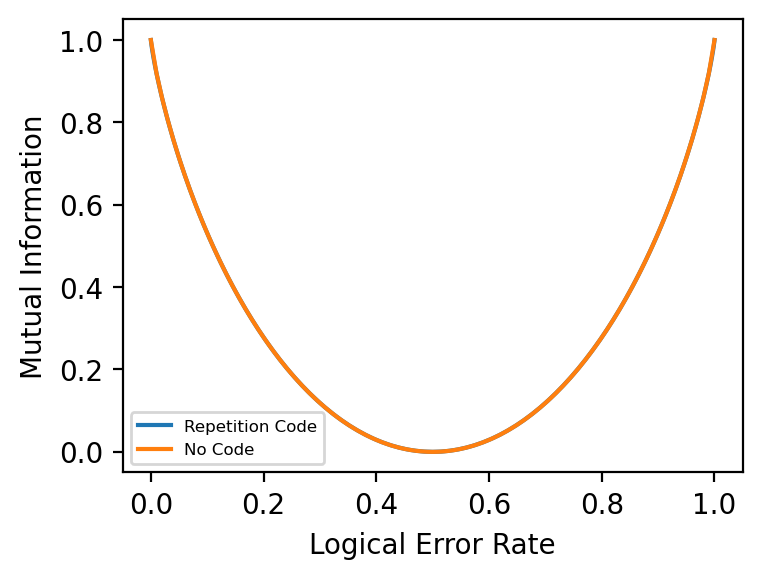

In [22]:
codes = {}
codes["Repetition Code"] = {"gates":[('CX', (0, 1)), ('CX', (0, 2))], "n": 3}
codes["No Code"] = {"gates":[], "n": 3}
run_code_analysis_mutual(codes, static=True)
plot_analysis_mutual(codes)

# I(X:Y) vs pe

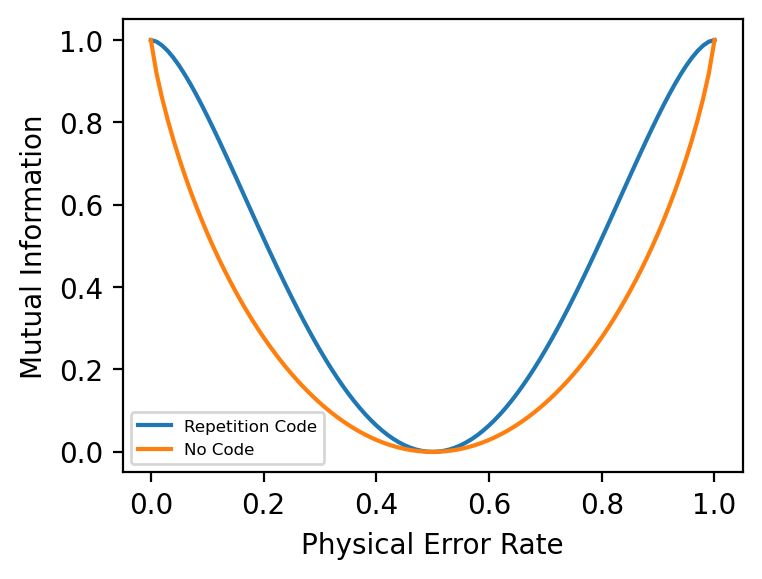

In [27]:
codes = {}
codes["Repetition Code"] = {"gates":[('CX', (0, 1)), ('CX', (0, 2))], "n": 3}
codes["No Code"] = {"gates":[], "n": 3}
run_code_analysis_mutual(codes, static=True)
plot_analysis_mutual_pe(codes)

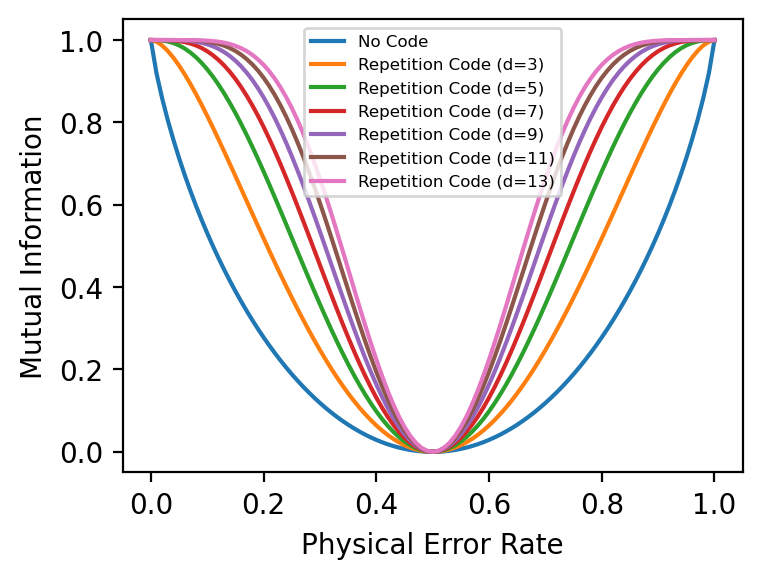

In [29]:
codes = {}
codes["No Code"] = {"gates":[],"n": 1}
for d in [3,5,7,9,11,13]:
    codes[f"Repetition Code (d={d})"] = {"gates":repetition_code_gates(d), "n": d}

run_code_analysis_mutual(codes, static=True)
plot_analysis_mutual_pe(codes)

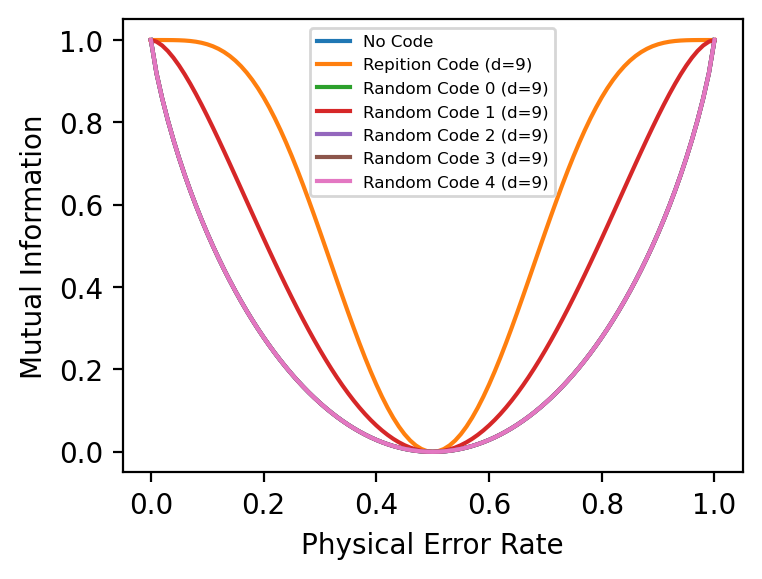

In [3]:
codes = {}
codes["No Code"] = {"gates":[],"n": 1}
d = 9
num_gates = 9*2
codes[f"Repition Code (d={d})"] = {"gates":repetition_code_gates(d), "n": d}
for j in range(5):
    codes[f"Random Code {j} (d={d})"] = {"gates":gen_random_encoding(d,num_gates), "n": d}
    
run_code_analysis_mutual(codes, static=True)
plot_analysis_mutual_pe(codes)

# Random Code Avg Performance

In [18]:
codes = {}
codes["No Code"] = {"gates":[],"n": 1}
d = 9
num_gates = 5
num_random_codes = 100

# Calculate Rep Code
rep_label = f"Repition Code (d={d})"
codes[rep_label] = {"gates":repetition_code_gates(d), "n": d}

# Calculate random codes
for j in range(num_random_codes):
    codes[(d,num_gates,j)] = {"gates":gen_random_encoding(d,num_gates), "n": d}
    
run_code_analysis_mutual(codes, static=True)

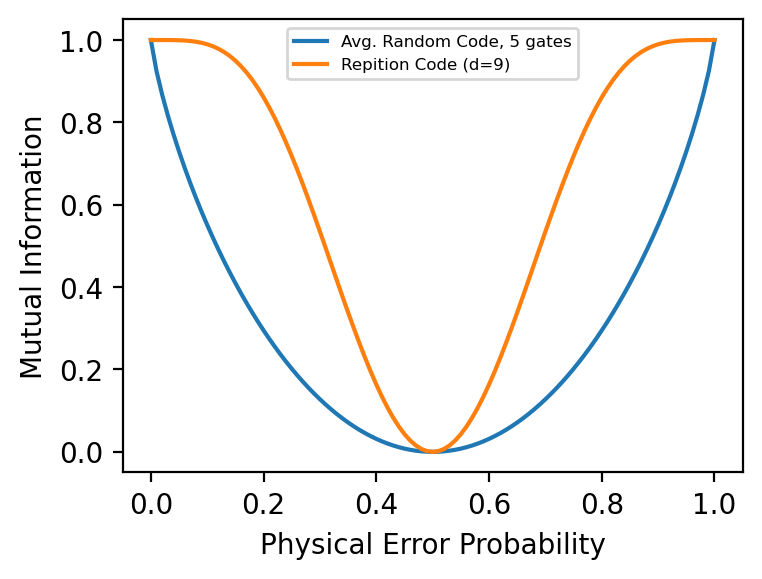

In [21]:
physical_error_probs = codes[(d,num_gates,0)]["physical_error_probs"]
avg_mutual_info = np.zeros_like(codes[(d,num_gates,0)]["physical_error_probs"])
rep_mutual_info = codes[rep_label]["Mutual Information"]

for j in range(num_random_codes):
    avg_mutual_info += codes[(d,num_gates,j)]["Mutual Information"]

avg_mutual_info = avg_mutual_info/num_random_codes


fig, axs = plt.subplots(1,1, figsize=(4,3), dpi=200, squeeze=False)
ax = axs[0][0]
ax.plot(physical_error_probs, avg_mutual_info, label=f"Avg. Random Code, {num_gates} gates")
ax.plot(physical_error_probs, rep_mutual_info, label=rep_label)
ax.set_xlabel("Physical Error Probability")
ax.set_ylabel("Mutual Information")
ax.legend(fontsize=6)

### vs. num of encoding gates

In [82]:
codes = {}
codes["No Code"] = {"gates":[],"n": 1}
d = 9
num_random_codes = 200
num_gates = [2,5,10,20,50,100,200,1000]

# Calculate Rep Code
rep_label = f"Repition Code (d={d})"
codes[rep_label] = {"gates":repetition_code_gates(d), "n": d}

# Calculate random codes
for ng in num_gates:
    for j in range(num_random_codes):
        codes[(d,ng,j)] = {"gates":gen_random_encoding(d,ng), "n": d}
    
run_code_analysis_mutual(codes, static=True)

In [83]:
def calculate_distance(y1, y2):
    return np.average(y1-y2)

In [86]:
physical_error_probs = codes[rep_label]["physical_error_probs"]
rep_mutual_info = codes[rep_label]["Mutual Information"]

avg_mutual_info = {}
distance_from_rep_mutual_info = {}
for k, ng in enumerate(num_gates):
    avg_mutual_info[ng] = np.zeros_like(physical_error_probs)
    dist_vals = []
    for j in range(num_random_codes):
        mi_vals = codes[(d,ng,j)]["Mutual Information"]
        avg_mutual_info[ng] += mi_vals
        dist_vals.append(calculate_distance(rep_mutual_info, np.array(mi_vals)))

    dist_vals = np.array(dist_vals)

    avg_mutual_info[ng] = avg_mutual_info[ng]/num_random_codes

    distance_from_rep_mutual_info[k] = (np.average(dist_vals), np.std(dist_vals))

distance_from_rep_mutual_info_avg = np.array([v[0] for v in distance_from_rep_mutual_info.values()])
distance_from_rep_mutual_info_std = np.array([v[1] for v in distance_from_rep_mutual_info.values()])

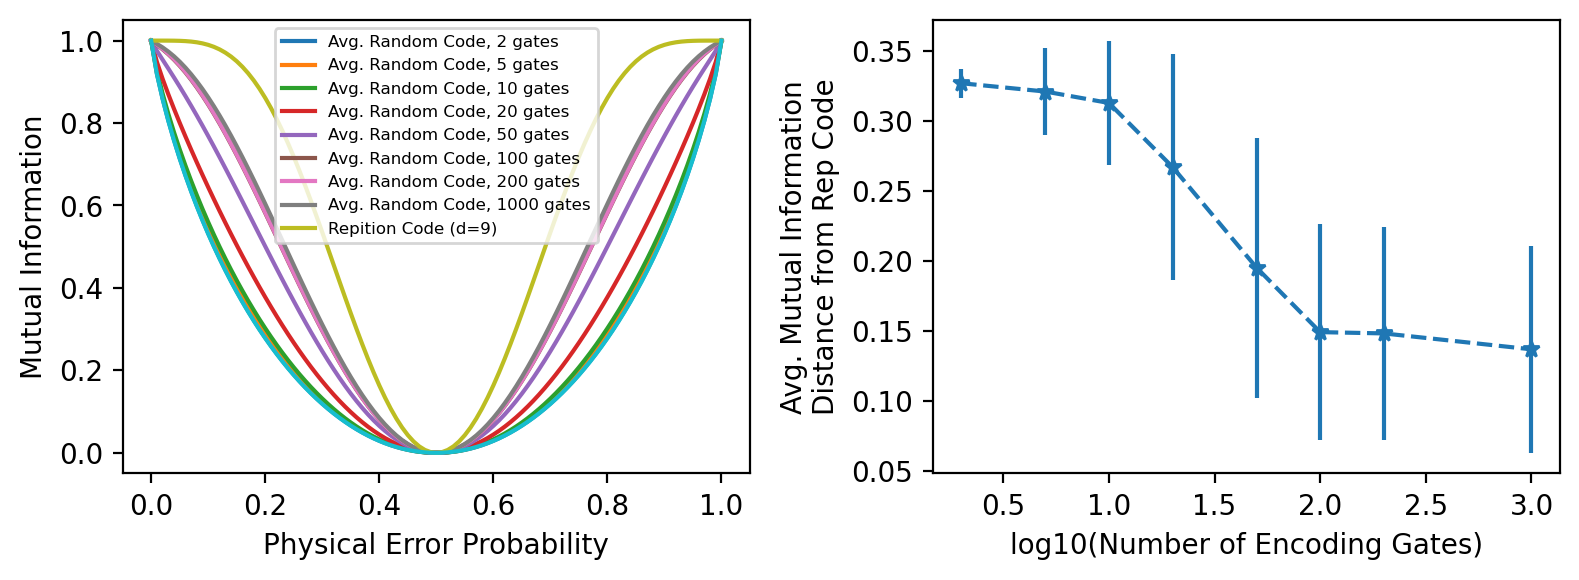

In [92]:
fig, axs = plt.subplots(1,2, figsize=(8,3), dpi=200, squeeze=False)
ax = axs[0][0]

for ng in num_gates:
    ax.plot(physical_error_probs, avg_mutual_info[ng], label=f"Avg. Random Code, {ng} gates")

ax.plot(physical_error_probs, rep_mutual_info, label=rep_label)
ax.plot(physical_error_probs, codes["No Code"]["Mutual Information"])
ax.set_xlabel("Physical Error Probability")
ax.set_ylabel("Mutual Information")
ax.legend(fontsize=6)


ax = axs[0][1]

ax.errorbar(np.log10(num_gates), distance_from_rep_mutual_info_avg, yerr=distance_from_rep_mutual_info_std, fmt="--*")
ax.set_xlabel("log10(Number of Encoding Gates)")
ax.set_ylabel("Avg. Mutual Information\nDistance from Rep Code")

fig.tight_layout()

In [ ]:
distances_mutual_info = {}
for ng in num_gates:
    ax.plot(physical_error_probs, avg_mutual_info[ng], label=f"Avg. Random Code, {ng} gates")